In [2]:
import numpy as np
import os
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [3]:
gt_path = '/Users/akre96/Data/BE_223B/MoNuSeg_Test_Set/ground_truth_centroids'
pred_path = '/Users/akre96/Data/BE_223B/MoNuSeg_Test_Set/predicted_centroids'

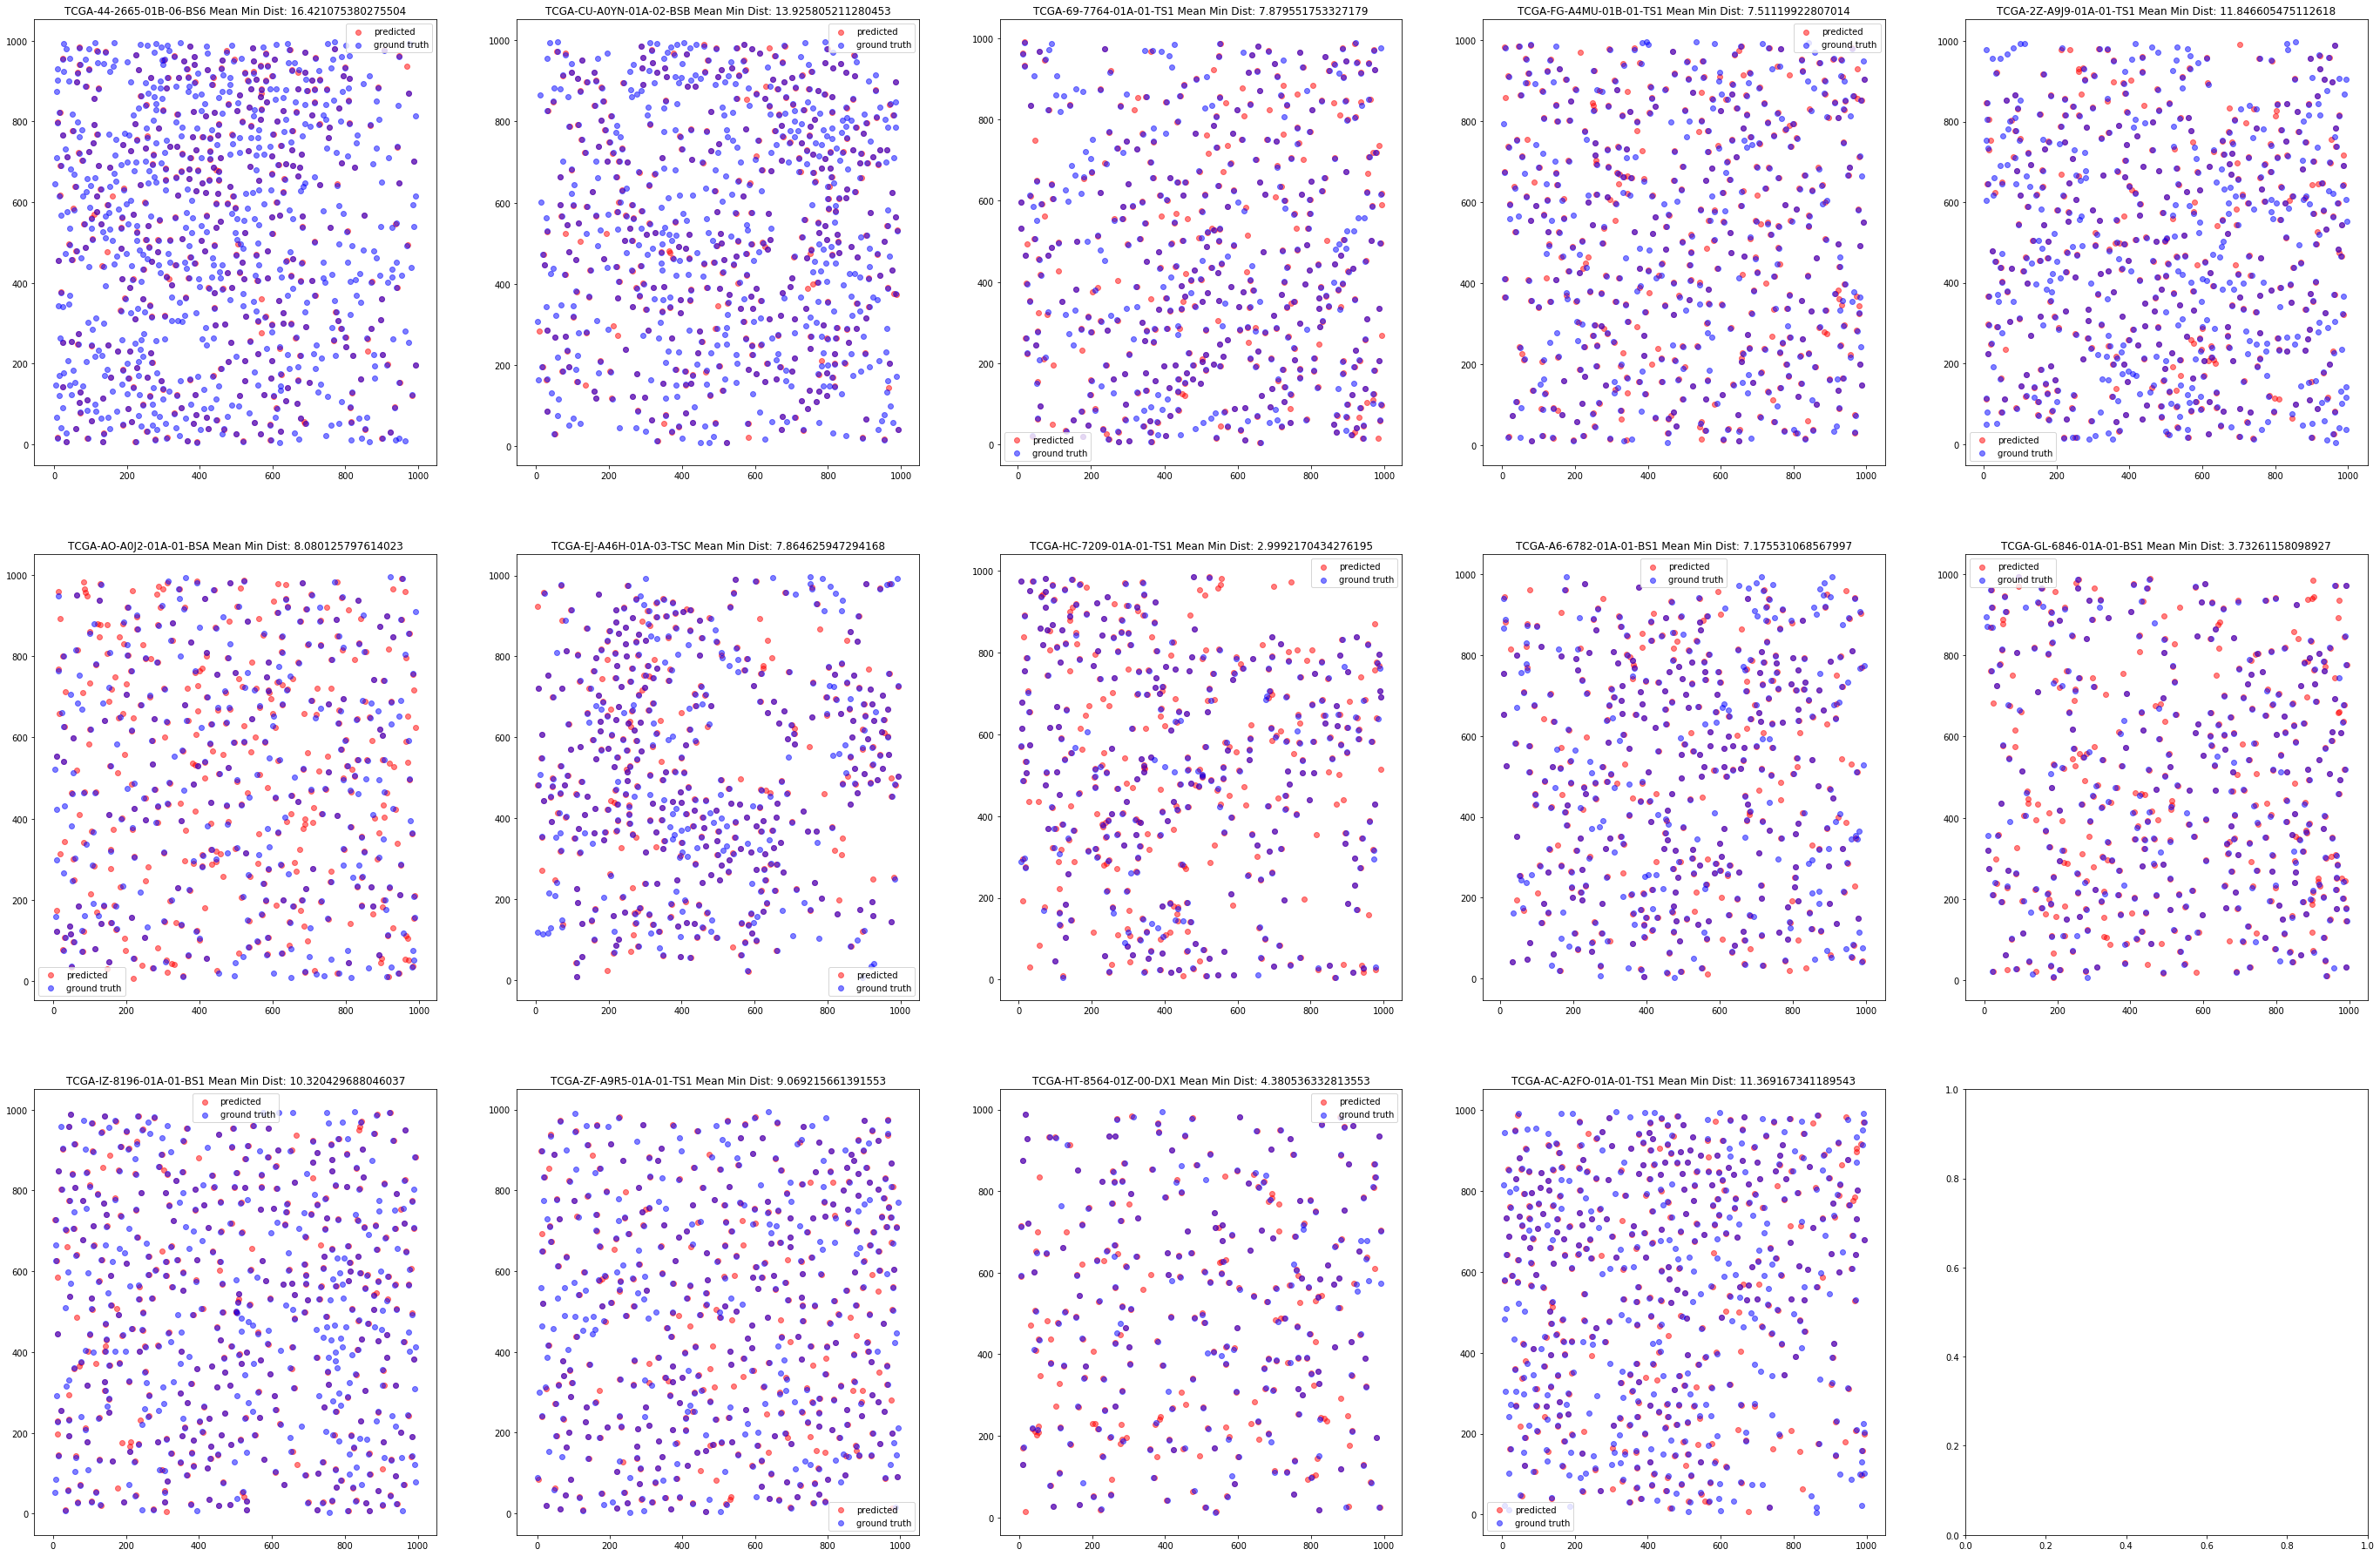

In [4]:
dist_dict = {}
mean_dists = []
gt_files = os.listdir(gt_path)

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(48,32))
i=0

for gt_f in gt_files:
    sample_name = gt_f.split('_')[0]
    gt_centroids = pd.read_csv(
        os.path.join(
            gt_path,
            gt_f
        )
    )
    pred_centroids = pd.read_csv(
        os.path.join(
            pred_path,
            sample_name + '_predicted-nuc-centroids.csv'
        )
    )
    dists = cdist(gt_centroids, pred_centroids)
    min_dists = np.min(dists, axis=1)
    dist_dict[sample_name] = min_dists
    ax = axes.flatten()[i]
    ax.scatter(pred_centroids['x'], pred_centroids['y'], c='red', alpha=.5, label='predicted')
    ax.scatter(gt_centroids['x'], gt_centroids['y'], c='blue', alpha=.5, label='ground truth')
    ax.legend()
    ax.set_title(sample_name + ' Mean Min Dist: ' + str(np.mean(min_dists)))
    mean_dists.append(np.mean(min_dists))
    i+=1

In [5]:
np.mean(mean_dists)
np.std(mean_dists)


3.664432145962257

(array([363.,  10.,  26.,  54.,  37.,  11.,  12.,   2.,   4.,   3.]),
 array([ 0.        ,  7.95110055, 15.90220111, 23.85330166, 31.80440221,
        39.75550276, 47.70660332, 55.65770387, 63.60880442, 71.55990497,
        79.51100553]),
 <a list of 10 Patch objects>)

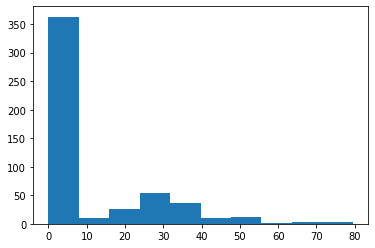

In [12]:
plt.hist(min_dists)



Text(0.5, 1.0, 'TCGA-AC-A2FO-01A-01-TS1 Mean Min Dist: 11.369167341189543')

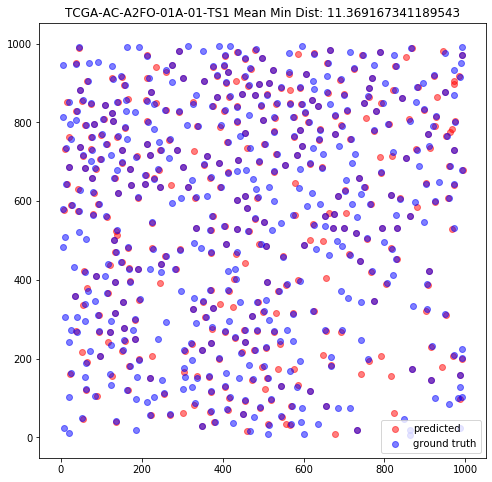

In [6]:

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(pred_centroids['x'], pred_centroids['y'], c='red', alpha=.5, label='predicted')
ax.scatter(gt_centroids['x'], gt_centroids['y'], c='blue', alpha=.5, label='ground truth')
ax.legend()
ax.set_title(sample_name + ' Mean Min Dist: ' + str(np.mean(min_dists)))